In [2]:
import os
import re
import pandas as pd

In [3]:
# change working directory to the /Users/tildeidunsloth/Desktop/DatSci_25/DatSci_25/cleaned
os.chdir('/Users/tildeidunsloth/Desktop/DatSci_25/DatSci25/data/cleaned/')

In [4]:
# load in csv file with pandas
df = pd.read_csv('parliament_speeches.csv')

In [5]:
# show ten first rows
print(df.head(10))

# check length of dataframe
print(len(df))

# check how many rows for each unique year
print(df['year'].value_counts())

# show rows with year 2000
print(df[df['year'] == 2000])

   year  meeting_number                speaker  \
0  2013              45         Valgs Prøvelse   
1  2013              45         Valgs Prøvelse   
2  2013              45              Formanden   
3  2013              45              Formanden   
4  2013              45         Valgs Prøvelse   
5  2013              45  Forhandling Formanden   
6  2013              45   Afstemning Formanden   
7  2013              45         Valgs Prøvelse   
8  2013              45  Forhandling Formanden   
9  2013              45   Afstemning Formanden   

                                              speech  
0  Godkendelse af stedfortræder som midlertidigt ...  
1  Godkendelse af stedfortræder som repræsentant ...  
2  Mødet er åbnet. I dag er der følgende anmeldel...  
3  Anne Baastrup (SF) har søgt om orlov på grund ...  
4  Godkendelse af stedfortræder som midlertidigt ...  
5  Fra Udvalget til Valgs Prøvelse har jeg modtag...  
6  Jeg slutter afstemningen. Udvalgets indstillin...  
7  Godken

In [6]:
# remove klima- minister from the dataframe
pattern = r'\bklima(?:[-,][^,\n\r]*?)*? *og *[^,\n\r]*?minister(?:en)?\b'
df['speech'] = df['speech'].str.replace(pattern, '', flags=re.IGNORECASE, regex=True)


In [7]:
# make a subset of rows where the word "klima" appears in the speech
klima_df = df[df['speech'].str.contains('klima', case=False, na=False)]

In [8]:
print(len(klima_df))
print(klima_df.head(10))

16897
      year  meeting_number                                            speaker  \
229   2013              45                                Christian Juhl (EL)   
454   2013              51                       Lars Christian Lilleholt (V)   
456   2013              51                                          Theil (S)   
460   2013              51                             Andreas Steenberg (RV)   
462   2013              51                                    Steen Gade (SF)   
464   2013              51                                   Per Clausen (EL)   
468   2013              51  Klima Energi Og Bygningsministeren (Rasmus Hel...   
469   2013              51                                     (Bent Bøgsted)   
895   2013              86                          Christian Friis Bach (RV)   
1837  2013              92                  Miljøministeren (Kirsten Brosbøl)   

                                                 speech  
229   Jeg tror ikke, at de fleste arbejdere 

In [9]:
# extract parties

# list of valid party abbreviations
valid_parties = {
    "S", "V", "DD", "SF", "LA", "M", "KF", "EL", "DF", "RV", "ALT", 
    "BP", "N", "IA", "SP", "JF", "CD", "NB", "KRF", "FP"
}

# Function to extract and validate party abbreviation
def extract_party(speaker):
    match = re.search(r'\(([^()]+)\)', speaker)
    if match:
        party = match.group(1).strip()
        if party in valid_parties:
            return party
    return None

# Apply to dataframe
klima_df['party'] = klima_df['speaker'].apply(extract_party)



<ipython-input-9-643e1546f9fc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  klima_df['party'] = klima_df['speaker'].apply(extract_party)


In [10]:
# count the number of times "klima" is mentioned per year
klima_count_per_year = klima_df['year'].value_counts().sort_index()
print(klima_count_per_year)

2000     141
2001     124
2002     195
2003     158
2004     113
2005     102
2006     318
2007     621
2008     798
2009    1145
2010     369
2011     280
2012     275
2013     383
2014     344
2015     921
2016     745
2017     662
2018    1068
2019    1613
2020    1383
2021    1281
2022    1492
2023    1411
2024     955
Name: year, dtype: int64


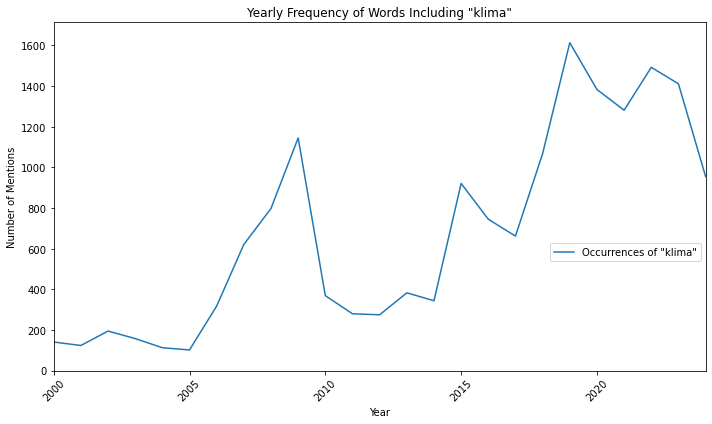

In [28]:
# plot klima mentions per year
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(klima_count_per_year.index, klima_count_per_year.values)
plt.title('Yearly Frequency of Words Including "klima"')
plt.xlabel('Year')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=45)
plt.xlim(klima_count_per_year.index.min(), klima_count_per_year.index.max())
plt.ylim(0, klima_count_per_year.max() + 100)
plt.legend(['Occurrences of "klima"'], loc='lower right', bbox_to_anchor=(1, 0.3))
plt.grid(False)
plt.tight_layout()
plt.savefig('klima_occurrences.png')

In [17]:
# save klima_df to a new csv file
klima_df.to_csv('klima_speeches.csv', index=False)